In [ ]:
#Install and import required libraries:
!pip install plotly

# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
#Load COVID-19 Dataset
#You can use the Our World in Data COVID dataset
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Preview
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [ ]:
#Data Cleaning
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop rows without country info
df = df[df['iso_code'].str.startswith('OWID') == False]

# Select relevant columns
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]

# Fill missing values with 0 for simplicity (can be handled better)
df.fillna(0, inplace=True)


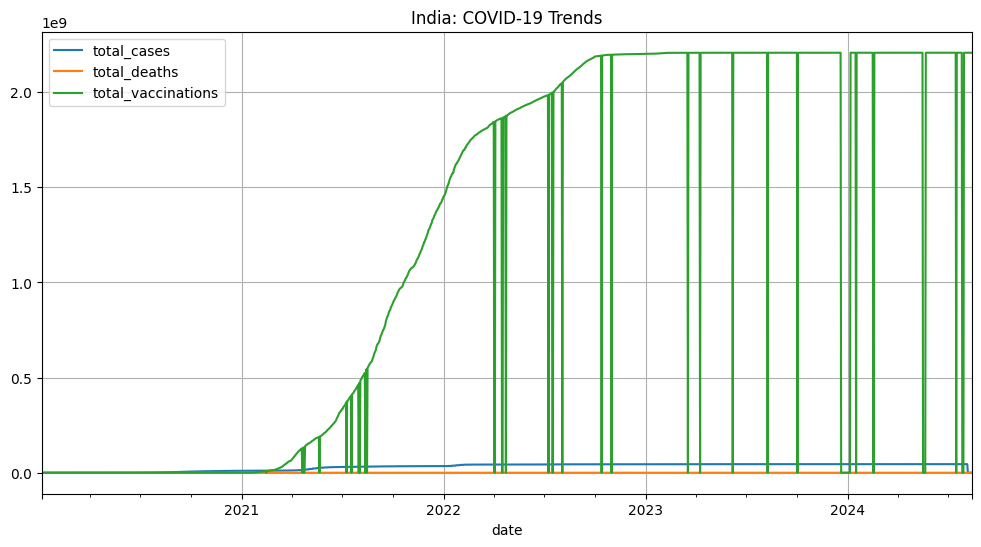

In [ ]:
#Filter Data for Specific Country (e.g., India)
india = df[df['location'] == 'India']
india.set_index('date', inplace=True)
india[['total_cases', 'total_deaths', 'total_vaccinations']].plot(figsize=(12,6), title='India: COVID-19 Trends')
plt.grid()
plt.show()


In [ ]:
#Compare Multiple Countries
countries = ['India', 'United States', 'Brazil', 'Germany']
multi = df[df['location'].isin(countries)]

fig = px.line(multi, x='date', y='total_cases', color='location', title='Total COVID-19 Cases Over Time')
fig.show()


In [ ]:
#Analyze Vaccination Trends
fig = px.line(multi, x='date', y='people_fully_vaccinated', color='location',
              title='Fully Vaccinated People Over Time')
fig.show()


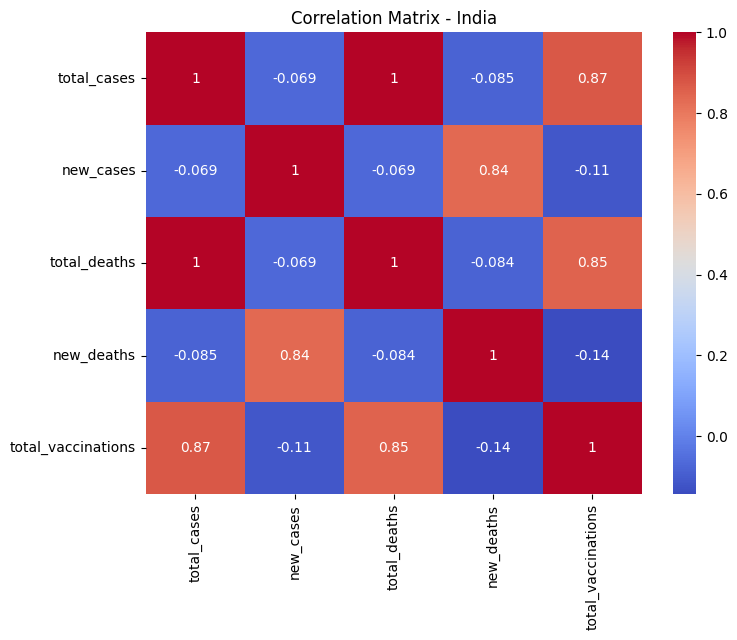

In [ ]:
#Correlation and Heatmaps
corr = india[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - India")
plt.show()
